In [1]:
import sys
sys.path.insert(0,'..')
from Disney.scraper import Scraper

In [4]:
sc = Scraper(dir_path="../", chrome_path="../drivers/chromedriver.exe")

In [6]:
# sc.scrape()

In [ ]:
tf = TFIDF(dir_path="../")
tf.generate()

In [1]:
# Data handling
import json
import numpy as np
import pandas as pd
from rich import print

# NLP
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import preprocessing
from nltk import word_tokenize

# Visualization
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")


def extract_tf_idf(documents, ngram_range=(1, 3)):
    no_features = None
    tfidf_vectorizer = TfidfVectorizer(max_features=no_features, ngram_range=ngram_range)
    tf_idf = tfidf_vectorizer.fit_transform(documents)
    tfidf_feature_names = tfidf_vectorizer.get_feature_names()
    df_idf = pd.DataFrame(np.array([tfidf_feature_names, tfidf_vectorizer.idf_]).T, columns=['Word', 'IDF'])
    
    return df_idf

def get_top_n_words(corpus, n=None, stopwords=None, ngram_range=(1, 1)):
    """ List the top n words in a vocabulary according to occurrence in a text corpus. """
    vec = CountVectorizer(ngram_range=ngram_range, stop_words=stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


def visualize_word_frequenty(data, n):
    f, ax = plt.subplots(figsize=(10, 4))
    sns.barplot(y=[x[0] for x in data[:n]], x=[y[1] for y in data[:n]], color='b')

    
def c_tf_idf(documents, m, ngram_range=(1, 1)):
    """ Calculate Class-based TF-IDF
    
    The result is a single score for each word
    
    documents = list of documents where each entry contains a single string
    of each class. For example, let's say you have 200 documents per class and you have 2 classes. 
    The documents is a list of two documents, where each document is a join of all 200 documents. 
    
    m = total number of documents
    
    """
    
    count = CountVectorizer(ngram_range=ngram_range).fit(documents)
    t = count.transform(documents)
    t = np.array(t.todense()).T
    w = t.sum(axis=0)
    tf = np.divide(t+1,w+1)
    sum_tij = np.array(t.sum(axis=1)).T
    idf = np.log(np.divide(m, sum_tij)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)
    
    return tf_idf, count

# with open('coco_reviews.json') as f:
#     coco = json.load(f)
    
# with open('frozen_reviews.json') as f:
#     frozen = json.load(f)

## Analysis - Top n Words

In [83]:
# freq = get_top_n_words(coco, n=100, stopwords="english", ngram_range=(1, 1))

In [123]:
# visualize_word_frequenty(freq, 20)

In [485]:
# df_idf = extract_tf_idf(coco, ngram_range=(1, 3))

In [124]:
# visualize_word_frequenty([tuple(r) for r in df_idf.sort_values("IDF", ascending=False).to_numpy()], 20)

## C-TF-IDF

In [8]:
with open('../data/pixar_reviews.json') as f:
    reviews = json.load(f)
    
titles = list(reviews.keys())
documents = [" ".join([doc for _, doc in reviews[title]]) for title in titles]
m = sum([len(reviews[title]) for title in titles])
tf_idf, count = c_tf_idf(documents, m, ngram_range=(1, 1))

In [9]:
result = pd.DataFrame(tf_idf, index=count.get_feature_names(), columns=titles)

In [10]:
result.sort_values("Toy Story 3", ascending=False).head(10)

,Toy Story,A Bug's Life,Toy Story 2,"Monsters, Inc.",Finding Nemo,The Incredibles,Cars,Ratatouille,WALL-E,Up,...,Brave,Monsters University,Inside Out,The Good Dinosaur,Finding Dory,Cars 3,Coco,Incredibles 2,Toy Story 4,Onward
toys,0.010536,0.000276,0.005572,0.000307,0.000190,0.000117,0.000346,0.000130,0.000119,0.000092,...,0.000111,0.000098,0.000123,0.000094,0.000092,0.000467,0.000055,0.000056,0.004720,0.000033
andy,0.010210,0.000033,0.004478,0.000015,0.000062,0.000026,0.000025,0.000011,0.000012,0.000017,...,0.000014,0.000040,0.000038,0.000050,0.000016,0.000051,0.000011,0.000011,0.002733,0.000047
lotso,0.000103,0.000064,0.000069,0.000030,0.000020,0.000017,0.000025,0.000021,0.000012,0.000034,...,0.000056,0.000039,0.000030,0.000033,0.000032,0.000050,0.000022,0.000022,0.000308,0.000046
college,0.000028,0.000103,0.000055,0.000142,0.000098,0.000041,0.000059,0.000051,0.000020,0.000027,...,0.000022,0.008532,0.000095,0.000130,0.000026,0.000080,0.000088,0.000053,0.000492,0.000037
woody,0.010603,0.000661,0.010158,0.000147,0.000094,0.000018,0.000053,0.000038,0.000026,0.000018,...,0.000060,0.000056,0.000053,0.000035,0.000023,0.000018,0.000016,0.000008,0.009648,0.000033
daycare,0.000037,0.000068,0.000037,0.000031,0.000065,0.000018,0.000053,0.000023,0.000026,0.000018,...,0.000030,0.000042,0.000016,0.000035,0.000068,0.000053,0.000023,0.000024,0.000058,0.000049
toy,0.004659,0.001151,0.004958,0.000879,0.000502,0.000340,0.000544,0.000281,0.000193,0.000244,...,0.000224,0.000330,0.000332,0.000185,0.000270,0.000226,0.000209,0.000093,0.004977,0.000215
ken,0.000037,0.000069,0.000037,0.000032,0.000022,0.000111,0.000027,0.000023,0.000013,0.000018,...,0.000030,0.000042,0.000016,0.000035,0.000034,0.000054,0.000024,0.000024,0.000078,0.000049
trilogy,0.000270,0.000168,0.000717,0.000077,0.000196,0.000165,0.000194,0.000037,0.000085,0.000089,...,0.000171,0.000375,0.000065,0.000114,0.000084,0.001527,0.000096,0.000116,0.001941,0.000199
buzz,0.014812,0.000221,0.008557,0.000175,0.000131,0.000051,0.000134,0.000073,0.000036,0.000034,...,0.000097,0.000077,0.000073,0.000048,0.000031,0.000025,0.000054,0.000011,0.004214,0.000068


In [11]:
top_200_words = {movie: None for movie in titles}
for movie in titles:
    words = result[[movie]].sort_values(movie, ascending=False).index[:200]
    values = result[[movie]].sort_values(movie, ascending=False).values[:200].flatten()
    top_200_words[movie] = [(word, value) for word, value in zip(words, values)]

In [27]:
# with open(f'../data/pixar_tfidf.json', 'w') as f:
#     json.dump(top_200_words, f)

In [12]:
result["Importance"] = result["WALL-E"].values / result.drop("WALL-E", 1).reset_index(drop=True).sum(axis=1).values

In [13]:
result.sort_values("Importance", ascending=False).head(10)

,Toy Story,A Bug's Life,Toy Story 2,"Monsters, Inc.",Finding Nemo,The Incredibles,Cars,Ratatouille,WALL-E,Up,...,Monsters University,Inside Out,The Good Dinosaur,Finding Dory,Cars 3,Coco,Incredibles 2,Toy Story 4,Onward,Importance
eve,0.000072,0.000044,0.000071,0.000020,0.000014,0.000012,0.000017,0.000030,0.009365,0.000024,...,0.000027,0.000021,0.000045,0.000022,0.000035,0.000015,0.000015,0.000013,0.000063,14.166724
robots,0.000028,0.000052,0.000055,0.000024,0.000016,0.000291,0.000139,0.000034,0.006652,0.000110,...,0.000031,0.000048,0.000026,0.000052,0.000081,0.000053,0.000053,0.000015,0.000037,5.124182
robot,0.000024,0.000044,0.000023,0.000040,0.000014,0.000718,0.000051,0.000058,0.008775,0.000128,...,0.000134,0.000102,0.000045,0.000022,0.000034,0.000030,0.000091,0.000049,0.000031,4.707481
cockroach,0.000041,0.000077,0.000041,0.000035,0.000024,0.000021,0.000030,0.000025,0.002356,0.000041,...,0.000047,0.000018,0.000039,0.000038,0.000060,0.000026,0.000026,0.000022,0.000055,3.054750
700,0.000042,0.000078,0.000041,0.000036,0.000025,0.000021,0.000030,0.000026,0.002252,0.000021,...,0.000047,0.000018,0.000039,0.000039,0.000061,0.000027,0.000027,0.000022,0.000055,2.889654
axiom,0.000041,0.000076,0.000082,0.000035,0.000024,0.000021,0.000029,0.000025,0.002352,0.000020,...,0.000047,0.000018,0.000039,0.000076,0.000060,0.000026,0.000026,0.000022,0.000055,2.838380
wall,0.000227,0.000040,0.000086,0.000102,0.000051,0.000124,0.000124,0.000167,0.015508,0.001451,...,0.000331,0.000342,0.000307,0.000231,0.000299,0.000380,0.000021,0.000028,0.000230,2.658680
earth,0.000148,0.000118,0.000042,0.000109,0.000138,0.000148,0.000152,0.000196,0.009820,0.000199,...,0.000072,0.000091,0.001579,0.000039,0.000123,0.000108,0.000122,0.000044,0.000112,2.539960
spaceship,0.000205,0.000076,0.000041,0.000035,0.000024,0.000020,0.000029,0.000025,0.002317,0.000020,...,0.000046,0.000018,0.000039,0.000038,0.000060,0.000026,0.000026,0.000022,0.000054,2.441615
ship,0.000129,0.000060,0.000097,0.000028,0.000211,0.000049,0.000023,0.000060,0.004305,0.000128,...,0.000073,0.000070,0.000061,0.000090,0.000094,0.000041,0.000187,0.000068,0.000086,2.244284


In [15]:
result.sort_values("Inside Out", ascending=False).head(10)

,Toy Story,A Bug's Life,Toy Story 2,"Monsters, Inc.",Finding Nemo,The Incredibles,Cars,Ratatouille,WALL-E,Up,...,Monsters University,Inside Out,The Good Dinosaur,Finding Dory,Cars 3,Coco,Incredibles 2,Toy Story 4,Onward,Importance
riley,0.000021,0.000039,0.000021,0.000018,0.000012,0.000010,0.000015,0.000013,0.000007,0.000010,...,0.000024,0.013997,0.000020,0.000039,0.000030,0.000013,0.000013,0.000022,0.000028,0.000517
emotions,0.000341,0.000191,0.000136,0.000425,0.000263,0.000231,0.000282,0.000370,0.000954,0.000685,...,0.000155,0.012424,0.000501,0.000444,0.000298,0.000633,0.000121,0.000413,0.000317,0.049631
sadness,0.000022,0.000041,0.000088,0.000057,0.000105,0.000033,0.000032,0.000069,0.000103,0.000417,...,0.000025,0.011485,0.000252,0.000185,0.000064,0.000212,0.000028,0.000163,0.000118,0.007435
inside,0.000235,0.000236,0.000270,0.000233,0.000408,0.000208,0.000234,0.000247,0.000316,0.000233,...,0.000226,0.011307,0.002742,0.000639,0.000395,0.001226,0.000174,0.000409,0.000817,0.015106
joy,0.000351,0.000154,0.000226,0.000302,0.000208,0.000155,0.000163,0.000423,0.000309,0.000317,...,0.000258,0.011058,0.000117,0.000230,0.000120,0.000515,0.000173,0.000337,0.000357,0.019203
anger,0.000060,0.000112,0.000030,0.000077,0.000018,0.000181,0.000043,0.000112,0.000054,0.000075,...,0.000034,0.006590,0.000171,0.000084,0.000219,0.000038,0.000039,0.000016,0.000080,0.006534
disgust,0.000033,0.000061,0.000065,0.000028,0.000039,0.000033,0.000047,0.000040,0.000012,0.000016,...,0.000037,0.005803,0.000062,0.000030,0.000047,0.000021,0.000021,0.000034,0.000043,0.001747
memories,0.000397,0.000247,0.000211,0.000205,0.000189,0.000066,0.000248,0.000197,0.000113,0.000709,...,0.000211,0.005454,0.000050,0.001059,0.000193,0.000898,0.000153,0.000432,0.000282,0.009297
mind,0.000637,0.000831,0.000466,0.000602,0.000618,0.000744,0.000489,0.000672,0.000764,0.000758,...,0.000748,0.005365,0.000885,0.000434,0.000680,0.000638,0.000519,0.000525,0.000424,0.040217
fear,0.000372,0.000595,0.000292,0.001120,0.000663,0.000293,0.000038,0.000280,0.000227,0.000092,...,0.000302,0.005047,0.001890,0.000173,0.000194,0.000238,0.000137,0.000252,0.000248,0.017332


## Wordcloud

In [17]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS
import random

%matplotlib inline

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(255, 255)

In [3]:
with open('../data/pixar_tfidf.json') as f:
    tfidf = json.load(f)

In [5]:
pd.DataFrame(tfidf['Coco'])

,0,1
0,coco,0.005590
1,miguel,0.004520
2,dead,0.003882
3,the dead,0.003833
4,of the dead,0.003442
...,...,...
1995,to coco,0.000162
1996,celebrate the,0.000162
1997,everything about,0.000162
1998,start to finish,0.000162


In [67]:
result.columns

Index(['Toy Story', 'A Bug's Life', 'Toy Story 2', 'Monsters, Inc.',
       'Finding Nemo', 'The Incredibles', 'Cars', 'Ratatouille', 'WALL-E',
       'Up', 'Toy Story 3', 'Cars 2', 'Brave', 'Monsters University',
       'Inside Out', 'The Good Dinosaur', 'Finding Dory', 'Cars 3', 'Coco',
       'Incredibles 2', 'Toy Story 4', 'Onward', 'Importance'],
      dtype='object')

In [75]:
result = pd.DataFrame(tf_idf, index=count.get_feature_names(), columns=titles)
result["Importance"] = result["Toy Story"].values / result.drop("Toy Story", 1).reset_index(drop=True).sum(axis=1).values
words = result.sort_values("Importance", ascending=False).index[:5000]
values = result.sort_values("Importance", ascending=False)['Importance'].values[:5000]

freq = {word: value for word, value in zip(words, values)}
text = " ".join([review[1] for review in reviews['Coco']])
mask = Image.open("../images/toy_mask.jpg")
# mask = np.array(mask.resize((mask.size[0]*4, mask.size[1]*4)))
mask = np.array(mask)

In [76]:
from wordcloud import ImageColorGenerator

(-0.5, 799.5, 583.5, -0.5)

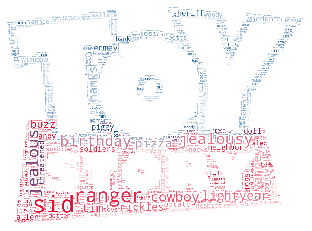

In [80]:
stopwords = []
wc = WordCloud(background_color="white", mode="RGBA", max_words=2000, mask=mask,
               stopwords=stopwords, min_font_size=1)
wc.generate_from_frequencies(freq)


# store default colored image
# default_colors = wc.to_array()
plt.imshow(wc.recolor(color_func=ImageColorGenerator(mask)), interpolation="nearest")
plt.axis("off")
# plt.show()
# plt.savefig("result.png", dpi=900)

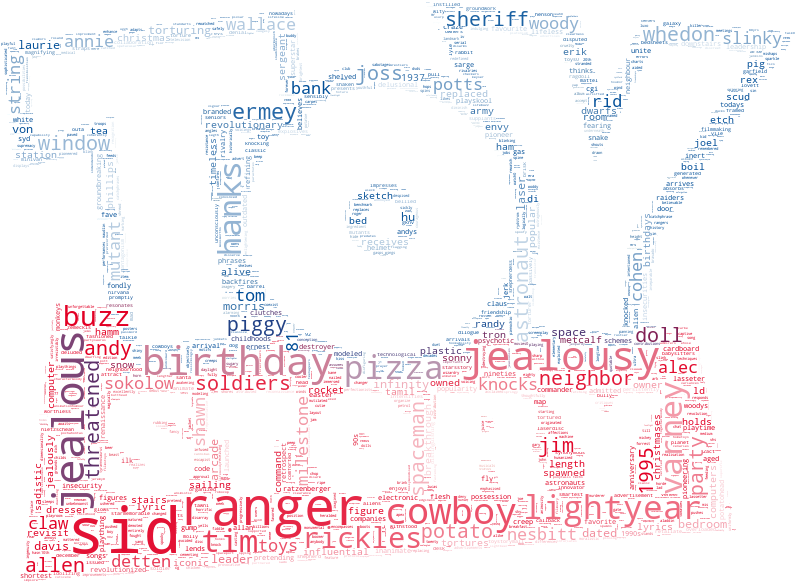

In [81]:
image = wc.to_image(); image

In [79]:
image.save("../images/toy_result.png")

In [ ]:
# Generate a word cloud image
mask = np.array(Image.open("img/us.png"))
wordcloud_usa = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(usa)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("img/us_wine.png", format="png")

plt.show()